# Tarea 1

**Envío del PR inicial: 24.08.2018** 

**Aceptación del PR: 02.09.2018** 

## 1

- Escriban una función `newton` que, a partir de `f`, `fprime` y `x0` dados, obtenga una de las raices de la ecuación. Comprueben que funciona con $f(x)=x^2 -2$ y $f'(x) = 2x$. Tengan suficiente cuidado para que no haya ningún tipo de inestabilidad de tipo en su función.

- Documenta la función de manera adecuada (*docstrings*).

- ¿Cómo se comporta, en términos del número de iterados, la convergencia del método de Newton?

#### *Definición y documentación de la función*:

Para implementar el método unidimensional, se puede hacer lo siguiente:

In [1]:
"""
    newton(f, fprime, x0, número_iteraciones)

`newton` es una implementación unidimensional compleja del método de Newton para encontrar raíces de la función `f`.

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función compleja (real) de variable compleja (real) de la que se quiere buscar una raíz (un punto \$ a \$ tales que \$ f(a) = 0 \$),
* `f_prime`, la función derivada de `f`, y,
* `x0`, una adivinanza inicial sobre la posición de la raíz.

Opcionalmente, se puede especificar lo siguiente:

* `número_iteraciones`, el número de iteraciones a realizar. (Por defecto está configurado en 1000 iteraciones.)

`newton` requiere que tanto `f` como `fprime` sean funciones, que `x0` sea un número y que `número_iteraciones` sea un número entero. `x0`, en particular, siempre es convertida a un número flotante para mejorar la estabilidad de tipo.

# Ejemplos
```julia-repl
    julia> newton(x -> x^2 - 2, x -> 2*x, 2, 5)
    1.4142135623730951

    julia> newton(x -> x^2 - 2, x -> 2*x, 1.4, 100)
    1.414213562373095

    julia> newton(x -> x^2 - 2, x -> 2*x, φ, 1)
    1.4270509831248424

    julia> newton(x -> x^2 - 2, x -> 2*x, φ, 10)
    1.414213562373095

    julia> newton(z -> z^2 + 1, z -> 2*z, -0.1*im, 5)
    0.0 - 1.0032578510960606im

    julia> newton(z -> z^2 + 1, z -> 2*z, -0.1*im, 10)
    0.0 - 1.0im
```
"""
function newton(f::Function, fprime::Function, x0::Number, número_iteraciones::Int = 1000)
    
    punto_actual = float(x0)
    
    for i in 1:número_iteraciones
        punto_actual -= f(punto_actual)/fprime(punto_actual)
    end
    
    return(punto_actual)
end

newton

#### *Ejemplo del cálculo de √2*:

Considerando las funciones $f(x) = x^ 2 - a$ y $g(x) = f'(x) = 2x$ se tiene que si $a \geq 0$, el método de Newton puede encontrar aproximaciones a las raíces cuadradas de $a$ según la adivinanza inicial otorgada.

In [2]:
#Generando el ejemplo con los siguientes parámetros:

f(x) = x^2 - 2
g(x) = 2*x
x0 = 1.5
iteraciones = 10

#La aproximación a la raíz cuadrada positiva de 2 calculada con el método es:

@show raíz_newton = newton(f, g, x0, iteraciones)

#Que el número calculado sea una aproximación a la raíz positiva es resultado de la elección de x0.
#La aproximación a la raíz cuadrada (positiva) de 2 calculada con la función `sqrt` es:

@show raíz = sqrt(2)

#Comparando si son iguales como números flotantes de 64 bits:

@show raíz_newton == raíz

raíz_newton = newton(f, g, x0, iteraciones) = 1.4142135623730951
raíz = sqrt(2) = 1.4142135623730951
raíz_newton == raíz = true


true

Por lo que el método implementado calculó correctamente la raíz cuadrada positiva de 2 como número flotante de 64 bits con 10 iteraciones, con la adivinanza inicial igual a 1.5.

#### *Análisis de la estabilidad de tipo*:
Para ver la estabilidad de tipo en un ejemplo, basta con usar el macro `@code_warntype` en la llamada a la función:

In [3]:
#Para el análisis se consideran las funciones y el número de iteraciones definidas para el ejemplo anterior. Lo que se va a modificar va a ser el tipo de adivinanza inicial suministrada.

x0 = 1.5 #Lo mismo que en el ejemplo anterior. 
@show typeof(x0) #Número flotante de 64 bits.

@code_warntype newton(f, g, x0, iteraciones)

typeof(x0) = Float64
Variables:
  #self# <optimized out>
  f <optimized out>
  fprime <optimized out>
  x0::Float64
  número_iteraciones::Int64
  i <optimized out>
  #temp#::Int64
  punto_actual::Float64

Body:
  begin 
      punto_actual::Float64 = x0::Float64 # line 45:
      SSAValue(2) = (Base.select_value)((Base.sle_int)(1, número_iteraciones::Int64)::Bool, número_iteraciones::Int64, (Base.sub_int)(1, 1)::Int64)::Int64
      #temp#::Int64 = 1
      5: 
      unless (Base.not_int)((#temp#::Int64 === (Base.add_int)(SSAValue(2), 1)::Int64)::Bool)::Bool goto 14
      SSAValue(3) = #temp#::Int64
      SSAValue(4) = (Base.add_int)(#temp#::Int64, 1)::Int64
      #temp#::Int64 = SSAValue(4) # line 46:
      punto_actual::Float64 = (Base.sub_float)(punto_actual::Float64, (Base.div_float)((Base.sub_float)((Base.mul_float)(punto_actual::Float64, punto_actual::Float64)::Float64, (Base.sitofp)(Float64, 2)::Float64)::Float64, (Base.mul_float)((Base.sitofp)(Float64, 2)::Float64, punto_actual::Fl

In [4]:
#El macro no emitió advertencias. Intentando con un entero:

x0 = 2
@show typeof(x0) #Número entero de 64 bits.

@code_warntype newton(f, g, x0, iteraciones)

typeof(x0) = Int64
Variables:
  #self# <optimized out>
  f <optimized out>
  fprime <optimized out>
  x0::Int64
  número_iteraciones::Int64
  i <optimized out>
  #temp#::Int64
  punto_actual::Float64

Body:
  begin 
      punto_actual::Float64 = (Base.sitofp)(Float64, x0::Int64)::Float64 # line 45:
      SSAValue(2) = (Base.select_value)((Base.sle_int)(1, número_iteraciones::Int64)::Bool, número_iteraciones::Int64, (Base.sub_int)(1, 1)::Int64)::Int64
      #temp#::Int64 = 1
      5: 
      unless (Base.not_int)((#temp#::Int64 === (Base.add_int)(SSAValue(2), 1)::Int64)::Bool)::Bool goto 14
      SSAValue(3) = #temp#::Int64
      SSAValue(4) = (Base.add_int)(#temp#::Int64, 1)::Int64
      #temp#::Int64 = SSAValue(4) # line 46:
      punto_actual::Float64 = (Base.sub_float)(punto_actual::Float64, (Base.div_float)((Base.sub_float)((Base.mul_float)(punto_actual::Float64, punto_actual::Float64)::Float64, (Base.sitofp)(Float64, 2)::Float64)::Float64, (Base.mul_float)((Base.sitofp)(Float64, 2)

In [5]:
#El macro tampoco emitió advertencias. Intentando con un irracional:

x0 = φ #El número áureo
@show typeof(x0) #Número irracional

@code_warntype newton(f, g, x0, iteraciones)

typeof(x0) = Irrational{:φ}
Variables:
  #self# <optimized out>
  f <optimized out>
  fprime <optimized out>
  x0 <optimized out>
  número_iteraciones::Int64
  i <optimized out>
  #temp#::Int64
  punto_actual::Float64

Body:
  begin 
      punto_actual::Float64 = 1.618033988749895 # line 45:
      SSAValue(2) = (Base.select_value)((Base.sle_int)(1, número_iteraciones::Int64)::Bool, número_iteraciones::Int64, (Base.sub_int)(1, 1)::Int64)::Int64
      #temp#::Int64 = 1
      5: 
      unless (Base.not_int)((#temp#::Int64 === (Base.add_int)(SSAValue(2), 1)::Int64)::Bool)::Bool goto 14
      SSAValue(3) = #temp#::Int64
      SSAValue(4) = (Base.add_int)(#temp#::Int64, 1)::Int64
      #temp#::Int64 = SSAValue(4) # line 46:
      punto_actual::Float64 = (Base.sub_float)(punto_actual::Float64, (Base.div_float)((Base.sub_float)((Base.mul_float)(punto_actual::Float64, punto_actual::Float64)::Float64, (Base.sitofp)(Float64, 2)::Float64)::Float64, (Base.mul_float)((Base.sitofp)(Float64, 2)::Float

In [6]:
#Tampoco emitió advertencias, esto debido al comportamiento de un irracional ante la función float(): se toma la representación como número flotante de 64 bits más cercana a dicho irracional. 

float(φ)

1.618033988749895

In [7]:
# Finalmente, intentando con un complejo de punto flotante:

x0 = 2.0im
@show typeof(x0) #Número complejo flotante de 64 bits

@code_warntype newton(f, g, x0, iteraciones)

typeof(x0) = Complex{Float64}
Variables:
  #self# <optimized out>
  f <optimized out>
  fprime <optimized out>
  x0::Complex{Float64}
  número_iteraciones::Int64
  i <optimized out>
  #temp#::Int64
  punto_actual::Complex{Float64}

Body:
  begin 
      punto_actual::Complex{Float64} = x0::Complex{Float64} # line 45:
      SSAValue(6) = (Base.select_value)((Base.sle_int)(1, número_iteraciones::Int64)::Bool, número_iteraciones::Int64, (Base.sub_int)(1, 1)::Int64)::Int64
      #temp#::Int64 = 1
      5: 
      unless (Base.not_int)((#temp#::Int64 === (Base.add_int)(SSAValue(6), 1)::Int64)::Bool)::Bool goto 21
      SSAValue(7) = #temp#::Int64
      SSAValue(8) = (Base.add_int)(#temp#::Int64, 1)::Int64
      #temp#::Int64 = SSAValue(8) # line 46:
      $(Expr(:inbounds, false))
      # meta: location In[2] f 3
      SSAValue(3) = (Base.sub_float)((Base.mul_float)((Core.getfield)(punto_actual::Complex{Float64}, :re)::Float64, (Core.getfield)(punto_actual::Complex{Float64}, :re)::Float64)::F

Tampoco arrojó advertencias. Estos ejemplos otorgan evidencia sobre la estabilidad de tipo de la función implementada. En todos los ejemplos se devolvió un número flotante de 64 bits.

#### *Análisis de la convergencia*:

Para analizar la convergencia del método, consideremos el ejemplo en el que se calcula una aproximación a la raíz cuadrada de dos con una adivinanza inicial constante. ¿Cómo cambia la diferencia entre el valor dado por Julia y el valor calculado con el método de Newton según el número de iteraciones?

Para hacer esto de forma automática y así poder graficar, conviene definir:

* Una función que otorgue la diferencia entre el valor de la raíz cuadrada de un número $a$ calculada por el método de Newton implementado y el valor de la misma raíz cuadrada calculada por Julia con una adivinanza inicial fija y un número de iteraciones dado.
    
* Un conjunto de valores de esta diferencia para diferentes cantidades de iteraciones.

In [8]:
"""
    diferencia_raíz_cuadrada(a, x0, número_iteraciones)

`diferencia_raíz cuadrada` calcula el valor absoluto de la diferencia entre el valor de la raíz cuadrada positiva del número real positivo \$ a \$ calculada mediante la función `sqrt` implementada en Julia y y la aproximación al valor de la misma raíz cuadrada calculada mediante el método de Newton con el número de iteraciones dado.

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `a`, el número real positivo del que se está calculando la raíz,
* `x0`, una adivinaza de la raíz (positiva) de \$ a \$, y, 
* `número_iteraciones`, el número de iteraciones realizadas en el método de Newton para calcular la raíz.

#Ejemplos:
```julia-repl
    julia> diferencia_raíz_cuadrada(2, 2, 1)
    0.08578643762690485

    julia> diferencia_raíz_cuadrada(2, 2, 3)
    2.1239014147411694e-6

    julia> diferencia_raíz_cuadrada(π, 1.5, 1)
    0.02474370029108175

    julia> diferencia_raíz_cuadrada(π, 1.5, 3)
    8.183899780078718e-9
```
"""
function diferencia_raíz_cuadrada(a::Real, x0::Real, número_iteraciones::Int)
    
    raíz_cuadrada_newton = newton(x -> x^2 - a, x -> 2*x, x0, número_iteraciones)
    raíz_julia = sqrt(a)
    
    diferencia = raíz_julia - raíz_cuadrada_newton
    valor_absoluto = abs(diferencia)
    
    return(valor_absoluto)
end

diferencia_raíz_cuadrada

In [9]:
#El conjunto de números de iteraciones para el cálculo muestra será de la forma: 

conjunto_iteraciones = 1:10

#Generando el conjunto de valores para analizar lo que sucede. Se ocupa:

x0 = 100

#Esto debido a que se quiere evitar que la diferencia sea cero para poder usar una gráfica semilogarítimica para visualizar los datos:

valores_raíz_newton = [diferencia_raíz_cuadrada(2, x0, i) for i in conjunto_iteraciones]

10-element Array{Float64,1}:
 48.5958    
 23.6108    
 11.1382    
  4.94168   
  1.92107   
  0.553252  
  0.0777873 
  0.00202777
  1.45168e-6
  7.4496e-13

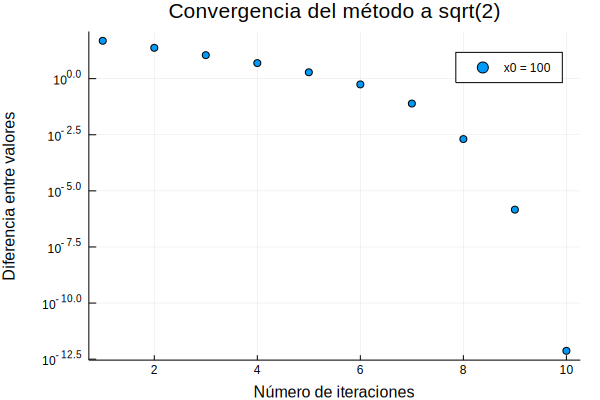

In [10]:
#Se requiere cargar la siguiente paquetería:

using Plots

scatter(valores_raíz_newton, title = "Convergencia del método a sqrt(2)", label = "x0 = $x0", yscale = :log10, xlabel = "Número de iteraciones", ylabel = "Diferencia entre valores")

Como se puede observar en la gráfica, al inicio de este ejemplo la convergencia del método es exponencial, y esta se acelera conforme aumenta el número de pasos. Esto se deduce de lo siguiente: sea $ y = A\exp(kx)$ con $ A > 0 $, entonces, $ \ln y = k x + \ln A$. Esta última ecuación significa que una tendencia exponencial en una gráfica semilogarítmica con la escala logarítmica en la ordenada se visualiza como una línea recta. El cambio de comportamiento al final del ejemplo corresponde a un cambio en la velocidad de convergencia del método, en particular, dado que el cambio en el valor es mayor por paso, la convergencia se acelera. La convergencia total es más rápida que la convergencia exponencial definida por los primeros pasos del método.

Esto, debe señalarse, debe de ser tomado como un ejemplo y no una demostración formal de la tasa de convergencia del método, en específico, porque la forma en la que se estudia la convergencia está limitada por el tipo de representación de los números usados en memoria y porque no se toman números arbitrarios para el estudio.

## 2

- Usando la función que hicieron en el ejercicio anterior y variando la condición inicial `x0`, de -3 a 3 con pasos suficientemente pequeños, por ejemplo `0.125`, grafiquen la dependencia de la raíz encontrada de la condición inicial para $f(x)=x^2-2$. Para hacer esto, vale la pena que guarden en un vector la raíz obtenida y en otro la condición inicial.

- Repitan el inciso anterior para $g(x) = (x-1)(x-2)(x-3)$, considerando el intervalo $x_0\in[1,3]$ y muchas condiciones iniciales.

In [11]:
"""
    comparación_valores(f, fprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones; legend)

`comparación_valores` es una función que muestra en una misma gráfica el valor de las aproximaciones obtenidas para las raíces de `f` mediante el método de Newton en la muestra de puntos iniciales especificada en las iteraciones especificadas. Para modificar la leyenda de la gráfica se utilizan los mismos argumentos que en la función `plot`; por defecto, la leyenda se muestra en la esquina superior izquierda.

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función real de variable real de la que se quiere buscar una raíz,
* `f_prime`, la función derivada de `f`,
* `valor_inicial`, la cota inferior del intervalo del cual se toma \$ x_0 \$,
* `valor_final`, la cota superior del intervalo del cual se toma \$ x_0 \$,
* `paso_valores`, la distancia entre las muestras de \$ x_0 \$ a considerar,
* `iteraciones_iniciales`, el número de iteraciones mínimo a usar,
* `iteraciones_finales`, el número de iteraciones máximo a usar, y,
* `paso_iteraciones`, la distancia entre las iteraciones a considerar.

Un argumento optativo es:

* `legend`, que ocupa los mismos *keyword arguments* de la función `plot` para modificar la posición de la leyenda en la gŕafica.

`comparación_valores` requiere que tanto `f` como `fprime` sean funciones; que `valor_inicial`, `valor_final` y `paso_valores`  sean reales; y que `iteraciones_iniciales`, `iteraciones_finales` y `paso_iteraciones` sean un números enteros. `valor_inicial`, `valor_final` y `paso_valores` en particular son convertidos en números flotantes de 64 bits.

# Ejemplo:

Si se desea visualizar las aproximaciones al valor de las raíces de la función `x -> x^2 - 2`  dadas por el método de Newton en el intervalo \$ [0,1]  \$ con paso de 0.01 con 3, 5 y 7 iteraciones se puede usar el comando:
```julia-repl
    julia> comparación_valores(x -> x^2 - 2, x -> 2*x, 0, 1, 0.01, 3, 7, 2)
```

# Notas:

**Nota**: Esta función, aunque sirve, no es computacionalmente eficiente ya que todas las iteraciones anteriores se vuelven a calcular cada vez que se calcula la siguiente. Esto es por la definición de la función `newton`; una sugerencia para evitar esto sería definir una función `iterados_newton` que guarde los resultados del cálculo a cada paso en un arreglo y que devuelva este. Asimismo, para implementar esto, probablemente se tenga que reestructurar la forma en la que están anidados los bucles `for`.
"""
function comparación_valores(f::Function, fprime::Function, valor_inicial::Real, valor_final::Real, paso_valores::Real, iteraciones_iniciales::Int, iteraciones_finales::Int, paso_iteraciones::Int; legend = :topleft)
    
    valor_inicial_flotante = float(valor_inicial)
    valor_final_flotante = float(valor_final)
    paso_valores_flotante = float(paso_valores)
    puntos_muestra = valor_inicial_flotante:paso_valores:valor_final_flotante
    gráfica = plot()

    for i in iteraciones_iniciales:paso_iteraciones:iteraciones_finales
        
        valores_raíz_iteraciones_i = []
        
        for j in puntos_muestra
            
            raíz = newton(f, fprime, j, i)
    
            push!(valores_raíz_iteraciones_i, raíz)
        end
        
        plot!(gráfica, puntos_muestra, valores_raíz_iteraciones_i, title = "Comparación del valor de la raíz según la posición inicial", xlabel = "x0", ylabel = "Raíz calculada", label = "iteraciones = $i", legend = legend)
    end

    return(gráfica)
end

comparación_valores

#### Análisis de las raíces de  $f(x) = x^2 - 2$.

Para realizar el estudio para $f(x) = x^2 - 2$, (re)definamos las siguientes funciones:

In [12]:
f(x) = x^2 - 2
fprime(x) = 2*x

fprime (generic function with 1 method)

Haciendo la comparación solicitada:

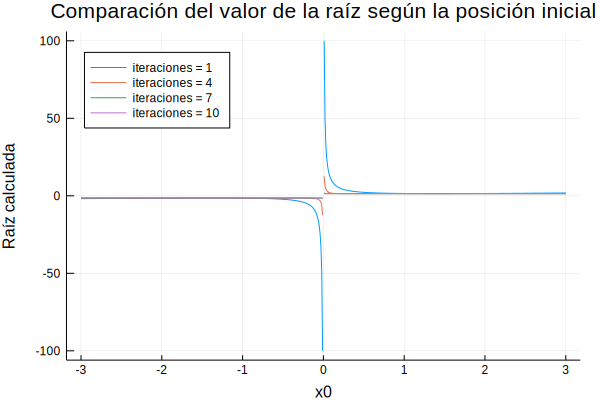

In [13]:
valor_inicial = -3
valor_final = 3
paso_valores = 0.01
iteraciones_iniciales = 1
iteraciones_finales = 10
paso_iteraciones = 3

comparación_raíz_1 = comparación_valores(f, fprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

Como se puede ver, conviene redimensionar el área que se muestra en la gráfica:

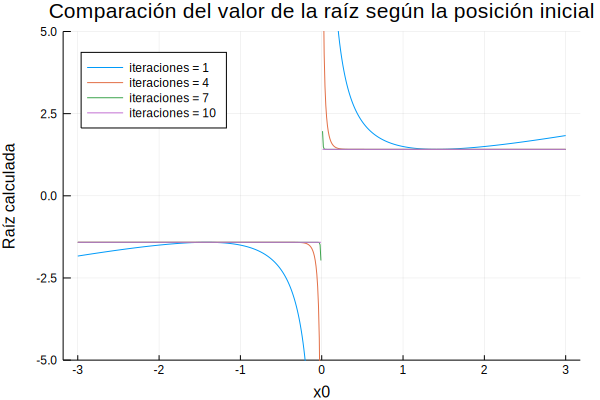

In [14]:
plot!(comparación_raíz_1, ylim = (-5, 5))

Como se puede observar, a mayor número de iteraciones, el método mejora su convergencia a los valores conocidos de las raíces a lo largo de los diferentes valores de $x_0$ mostrados. Los "picos" observados en torno a $x_0 = 0$ corresponden al cambio de la raíz que arroja el método (de la raíz negativa a la raíz positiva). La forma de estos picos es explicada por el hecho de que $x_0 = 0$ es un punto crítico de $f$, lo que indetermina el cociente al dar un paso con el método. Obsérvese que la velocidad de convergencia en torno a $x_0 \approx \pm \sqrt 2$ es máxima (las curvas generadas de considerar diferentes números de iteraciones son más cercanas en estas regiones).

#### Análisis de las raíces de  $g(x) = (x-1)(x-2)(x-3)$.
Para realizar el estudio para $g(x) = (x-1)(x-2)(x-3)$, (re)definamos las siguientes funciones:

In [15]:
g(x) = (x-1)*(x-2)*(x-3)
gprime(x) = (x-2)*(x-3) + (x-1)*(x-3) + (x-1)*(x-2)

gprime (generic function with 1 method)

Haciendo la comparación solicitada:

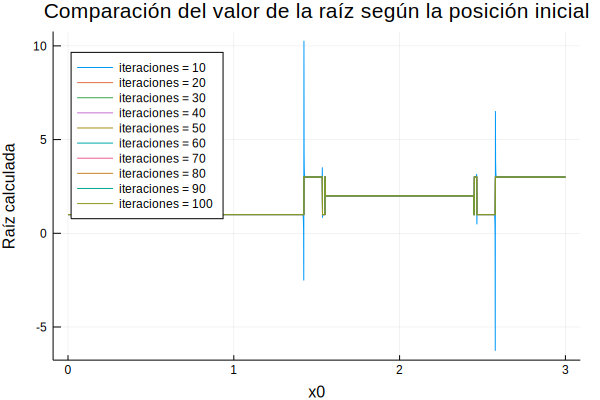

In [16]:
valor_inicial = 0
valor_final = 3
paso_valores = 0.001
iteraciones_iniciales = 10
iteraciones_finales = 100
paso_iteraciones = 10

comparación_raíz_2 = comparación_valores(g, gprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

En el caso de la función $ g(x) $ se observa, salvo en el caso en el que se tomaron 10 iteraciones en cada punto, que existe una convergencia rápida a valores específicos dentro de la "malla" de puntos iniciales; sin embargo, existen ciertas regiones, aparentemente puntuales, en las que hay un comportamiento que no se ajusta al comportamiento general de la gráfica (valores constantes de la raíz calculada en intervalos "más o menos" grandes). 

Haciendo una gráfica más detallada de sólo los resultados producto de 100 iteraciones de cada punto, se puede visualizar de forma más sencilla este hecho:

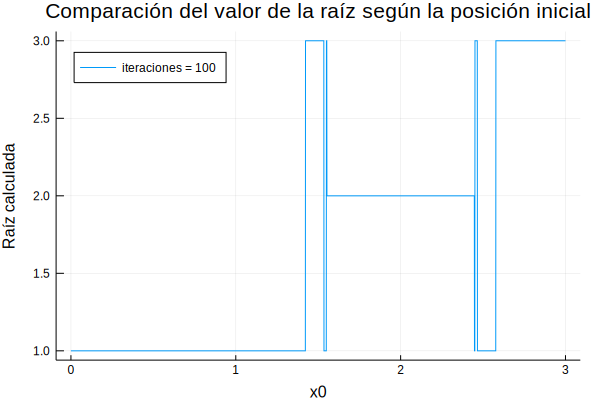

In [17]:
valor_inicial = 0
valor_final = 3
paso_valores = 0.001
iteraciones_iniciales = 100
iteraciones_finales = 100
paso_iteraciones = 1

comparación_raíz_2_detalle = comparación_valores(g, gprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

Como se puede ver, de manera burda, existen cinco intervalos visibles del conjunto de puntos muestra en la gráfica anterior en los que cambia el valor de la raíz calculada. En todos los casos, salvo en los que existen cambios en el valor predicho de la raíz, se obtienen los valores esperados de las raíces de la función $ g(x) $ ($ x_0  = 1, 2, 3$). Existen cuatro puntos en torno a $ x_0 = 1.5 $ y $ x_0 = 2.4 $ que generan un comportamiento que aparenta ser muy localizado. Realizando un estudio detallado de estos puntos, como el mostrado a continuación, se notará que en realidad este comportamiento no es puntual como se puede pensar en primera aproximación, sino que son efectos de la malla de puntos muestra usada para generar la gráfica. Esto quiere decir que, en principio, son nueve los intervalos "visibles" con esta malla de puntos iniciales en los que se aprecia un cambio de resultado.

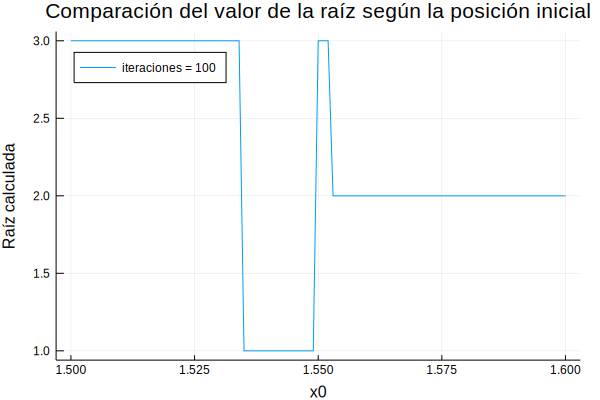

In [18]:
valor_inicial = 1.5
valor_final = 1.6
paso_valores = 0.001
iteraciones_iniciales = 100
iteraciones_finales = 100
paso_iteraciones = 1

comparación_raíz_2_detalle_puntos_1 = comparación_valores(g, gprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

De la gráfica anterior, resulta evidente que cerca de $x_0 = 1.530$ y de $x_0 = 1.550$ en efecto existen intervalos ("pequeños") de puntos que arrojan un resultado distinto al que se espera de los intervalos que les rodean, pero que entran dentro de los valores esperados para las raíces. La inclinación de las líneas en torno de estos puntos no es resultado de predicciones de raíces inesperadas de forma analítica, sino un efecto de la finitud de los puntos usados para graficar. (Una nota interesante: si se mejora la resolución de la malla en aproximadamente diez veces, en esta gráfica se encuentra ¡otro "pico" de valores que no se observa en la actual! Esto de contar intervalos en los que se aprecia o no una uniformidad de comportamiento es dependiente de la "fineza" de la malla.)

Para el otro punto en el que se aprecia un comportamiento similar ($x_0 = 2.4$): 

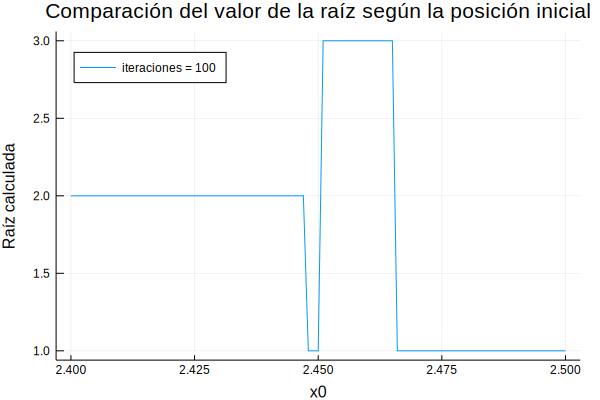

In [19]:
valor_inicial = 2.4
valor_final = 2.5
paso_valores = 0.001
iteraciones_iniciales = 100
iteraciones_finales = 100
paso_iteraciones = 1

comparación_raíz_2_detalle_puntos_2 = comparación_valores(g, gprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

Todos los comentarios realizados para el primer detalle en torno a $ x_0 = 1.5 $ se mantienen para esta gráfica, salvo la posición de los valores en los que cambia el comportamiento de la misma: $x_0 = 2.445$ y $ x_0 = 2.465 $. Esto también incluye lo mencionado sobre el "pico" no visible con esta resolución. Otro comentario importante es que esta gráfica se comporta como la reflexión especular respecto al eje $ y $ de la reflexión especular en torno al eje $ x $ de la gráfica anterior.
 
Como punto final, y para tratar de entender la existencia de estos picos tan "pequeños", conviene graficar la función y sus primeras dos derivadas:

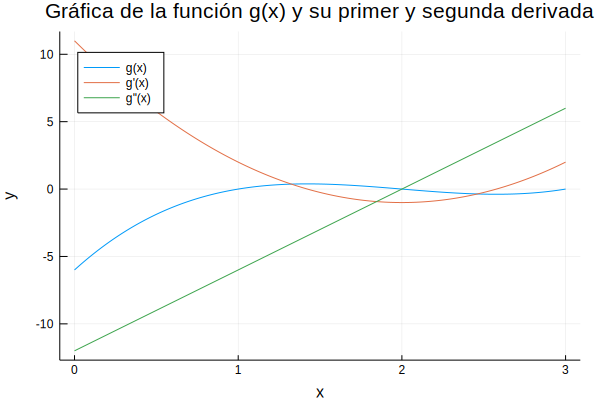

In [20]:
#Definiendo la segunda derivada:
gdoubleprime(x) = 6*x - 12

#Procediendo a graficar:
valor_inicial = 0
valor_final = 3
paso_valores = 0.001
dominio = valor_inicial:paso_valores:valor_final

gráfica_g = plot(dominio, g, label = "g(x)")
plot!(gráfica_g, dominio, gprime, label = "g'(x)")
plot!(gráfica_g, dominio, gdoubleprime, label = "g''(x)", xlabel = "x", ylabel = "y", title = "Gráfica de la función g(x) y su primer y segunda derivada", legend = :topleft)

Como se puede ver en la gráfica de la función, las tres raíces analíticas esperadas en efecto son raíces de la función. Más aún, la derivada se anula en torno a los puntos en los que se detecta un comportamiento "puntual" de la función: esto permite explicar el por qué este comportamiento "errático" ocurre en la vecindad de estos puntos. Finalmente, el hecho de la "doble reflexión especular" en torno a estos puntos con "comportamiento errático" se puede explicar debido al cambio de signo de la segunda derivada en el sitio en el que se situaría el origen de los espejos (en torno a $ x_0 = 1.8$, visible en la primer gráfica de las raíces de la función $g(x)$), lo que responde a un cambio en la curvatura de la función $ g(x)$: en lugar de que la derivada disminuya conforme se avanza en $ x $, como ocurre antes del punto de inflexión comentado, la derivada aumenta conforme se avanza en $x$, lo que cambia la forma en la que las raíces van apareciendo en la gráfica inicial.

## 3

Considerando la función $h(z)=z^3-c$, con $z\in\mathbb{C}$ y $c=1$, utiliza el método de Newton para encontrar las raices en el plano complejo de dicha ecuación. Repite el ejercicio de la dependencia de la raíz encontrada de las condiciones iniciales, graficando en el plano de Argand.

Definiendo la función $h(z) = z^3 - 1 $ y su derivada: $h'(z) = 2z$:

In [21]:
h(z) = z^3 - 1;
hprime(z) = 3*z^2

hprime (generic function with 1 method)

Se sabe que las raíces de la ecuación $ h(z) = 0 $ son: $ z= e^{\frac{2 n \pi i}{3}} $ con $ n \in \{0, 1, 2\}$. En principio, se pueden proponer las siguientes tres condiciones iniciales de manera "educada":

In [22]:
z0 = 2 + 0im
z1 = 2im
z2 = -2im

0 - 2im

Estas condiciones corresponden a puntos sobre los ejes a una distancia de 2 unidades del origen, elegidos de tal forma que cada uno de ellos estén más cerca de una raíz distinta. Calculando las raíces con el método de Newton del ejercicio 1 (válido también para funciones complejas) y comparando con la raíz analítica esperada:

In [23]:
#Para z0, con raíz analítica esperada 1:

iteraciones = 10
@show raíz_z0_numérica = newton(h, hprime, z0, iteraciones)
@show raíz_z0_analítica = exp((2*0*π*im)/3)
@show raíz_z0_numérica == raíz_z0_analítica

raíz_z0_numérica = newton(h, hprime, z0, iteraciones) = 1.0 + 0.0im
raíz_z0_analítica = exp((2 * 0 * π * im) / 3) = 1.0 + 0.0im
raíz_z0_numérica == raíz_z0_analítica = true


true

In [24]:
#Para z1, con raíz analítica esperada exp(2*π*i/3):

iteraciones = 10
@show raíz_z1_numérica = newton(h, hprime, z1, iteraciones)
@show raíz_z1_analítica = exp((2*1*π*im)/3)
@show raíz_z1_numérica == raíz_z1_analítica

raíz_z1_numérica = newton(h, hprime, z1, iteraciones) = -0.5 + 0.8660254037844387im
raíz_z1_analítica = exp((2 * 1 * π * im) / 3) = -0.4999999999999998 + 0.8660254037844387im
raíz_z1_numérica == raíz_z1_analítica = false


false

In [25]:
#Para z2, con raíz analítica esperada exp(2*π*i/3):

iteraciones = 10
@show raíz_z2_numérica = newton(h, hprime, z2, iteraciones)
@show raíz_z2_analítica = exp((2*2*π*im)/3)
@show raíz_z2_numérica == raíz_z2_analítica

raíz_z2_numérica = newton(h, hprime, z2, iteraciones) = -0.5 - 0.8660254037844387im
raíz_z2_analítica = exp((2 * 2 * π * im) / 3) = -0.5000000000000004 - 0.8660254037844385im
raíz_z2_numérica == raíz_z2_analítica = false


false

Se observa que los valores obtenidos numéricamente aparentemente no concuerdan entre si en el caso de las raíces distintas de uno. El error resulta relativamente pequeño ya que es, cuanto más, el doble del *épsilon de la máquina* (la diferencia mínima entre la representación del número uno y el siguiente flotante al número uno).

El épsilon de la máquina para flotantes de 64 bits es:

In [26]:
épsilon_64 = eps(Float64)

2.220446049250313e-16

La diferencia entre el valor analítico esperado y el valor numérico obtenido para `z1` es:

In [27]:
δ1 = raíz_z1_analítica - raíz_z1_numérica

2.220446049250313e-16 + 0.0im

Comparando los valores absolutos de las partes real e imaginaria de la diferencia con el épsilon de la máquina:

In [28]:
@show abs(real(δ1)) == épsilon_64 #Igual al épsilon
@show abs(imag(δ1)) < épsilon_64 #Menor que el épsilon

abs(real(δ1)) == épsilon_64 = true
abs(imag(δ1)) < épsilon_64 = true


true

Repitiendo el análisis para `z2`:

In [29]:
#La diferencia entre el valor analítico esperado y el valor obtenido para z2 es:

@show δ2 = raíz_z2_analítica - raíz_z2_numérica

#Comparando los valores absolutos de las partes real e imaginaria de la diferencia con el épsilon de la máquina:

@show abs(real(δ2)) == 2*épsilon_64 #Igual a dos veces el épsilon de la máquina.
@show abs(imag(δ2)) == épsilon_64 #Igual al épsilon de la máquina.

δ2 = raíz_z2_analítica - raíz_z2_numérica = -4.440892098500626e-16 + 2.220446049250313e-16im
abs(real(δ2)) == 2épsilon_64 = true
abs(imag(δ2)) == épsilon_64 = true


true

Como se puede ver, aunque existen errores, estos son relativamente pequeños. La comparación con el épsilon de la máquina resulta adecuada dado que las raíces tienen norma unitaria, aunque es necesario mencionar que la diferencia entre un flotante y el siguiente, al menos en Julia, depende del flotante mismo:

In [30]:
#La función nextfloat otorga el siguiente flotante al flotante dado.
#Si a = 0.0, la diferencia con el siguiente flotante a cero es:

a = 0.0
@show nextfloat(a) - a

#Si a = 1.0, la diferencia con el siguiente flotante a uno (el épsilon de la máquina) es:
a = 1.0
@show nextfloat(a) - a

#Si a = 1e300, la diferencia con el siguiente flotante a 1e300 es:
a = 1e300
@show nextfloat(a) - a


nextfloat(a) - a = 5.0e-324
nextfloat(a) - a = 2.220446049250313e-16
nextfloat(a) - a = 1.487016908477783e284


1.487016908477783e284

Modificando el número de iteraciones en el cálculo de las raíces se observa que los valores se estancan en los mostrados anteriormente. Lo que podría estar sucediendo es que en el momento de querer dar más pasos, las diferencias generadas por el método son menores a la distancia entre flotantes distintos que puede reconocer la máquina. Una forma de hacer esto es aumentar la precisión de los números con los que se trabaja. Para poder analizar esto, se sugiere hacer el estudio separando componentes real e imaginaria y utilizar flotantes de precisión arbitraria (`BigFloat`). (No pude encontrar referencias que hablaran de complejos de precisión arbitraria, probablemente porque los complejos de un "tipo de precisión" pueden tratarse como duplas de flotantes de "medio tipo de precisión", como lo sugiere la documentación de `Complex`.)

#### Gráficas de la convergencia del método a las raíces con diferentes posiciones iniciales.

Conviene definir una función que grafique la trayectoria del método a lo largo de un conjunto de iteraciones de un conjunto de condiciones iniciales dado. Para facilitar la visualización, se utilizan esquemas de colores predefinidos en la paquetería `Colors.jl`:

In [31]:
#Cargando la paquetería:
using Colors

In [32]:
#Definiendo la función:

"""
    comparación_valores_complejos(f, fprime, valores_iniciales, número_iteraciones; colorscheme)

`comparación_valores_complejos` es una función que muestra en una misma gráfica del plano complejo el valor de los datos obtenidos de la implementación del método de Newton sobre una muestra de puntos iniciales especificada a lo largo del número de iteraciones dado para la función `f`. Cada trayectoria es graficada con un color distinto y el color del marcador de una iteración particular es el mismo en todas las trayectorias. El color de los marcadores está dado por la función `colorscheme` de la paquetería `Colors.jl`. El valor por defecto del esquema de color es `"Blues"`. Esto quiere decir que, por defecto, el color del marcador para una iteración dada va de azul claro a azul oscuro conforme el valor de la iteración correspondiente aumenta.

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función compleja de variable compleja de la que se quiere buscar una raíz,
* `f_prime`, la función derivada de `f`,
* `valores`, el arreglo unidimensional de números que se usarán como valores iniciales para el método de Newton, y,
* `número_iteraciones`, el número de iteraciones del método de Newton mostradas en la gráfica.

Un argumento optativo es:

* `colorscheme`, que determina el esquema de color a usar para los marcadores. Los esquemas de color definidos por la paquetería `Colors.jl` pueden ser usados para alterar el color de los marcadores de la siguiente manera:

```julia-repl
    colorscheme = "Reds"
```

`comparación_valores_complejos` requiere que tanto `f` como `fprime` sean funciones, que `valores_iniciales`  sea un arreglo unidimensional de números, y que `número de iteraciones` sea un entero. Los valores iniciales suministrados, en particular, son convertidos en números complejos flotantes de 64 bits.

# Ejemplo:

Si se desea visualizar las aproximaciones al valor de las raíces de la función `z -> z^3 - 1`  dadas por el método de Newton con condiciones inciales dadas por \$ 2, 2i \$ y \$ - 2i \$ a lo largo de 10 iteraciones se puede usar el comando:
```julia-repl
    julia> comparación_valores_complejos(z -> z^3 - 1, z -> 2*z, [2, 2im, -2im], 10)
```

# Notas:

**Nota**: Esta función, aunque sirve, no es computacionalmente eficiente ya que todas las iteraciones anteriores se vuelven a calcular cada vez que se calcula la siguiente. Esto es por la definición de la función `newton`; una sugerencia para evitar esto sería definir una función `iterados_newton` que guarde los resultados del cálculo a cada paso en un arreglo y que devuelva este. Asimismo, para implementar esto, probablemente se tenga que reestructurar la forma en la que están anidados los bucles `for`.
"""
function comparación_valores_complejos(f::Function, fprime::Function, valores_iniciales::Array, número_iteraciones::Int; colorscheme = "Blues")
    
    gráfica = plot()
    colores = colormap(colorscheme, número_iteraciones + 1) #Facilita los colores
    
    for i in valores_iniciales
    
        valor = Complex{Float64}(i) #Convierte la entrada en un complejo con entradas de punto flotante de 64 bits
        puntos = [valor]

        for j in 1:número_iteraciones
    
            valor = newton(f, fprime, valor, j)
            push!(puntos, valor)
        end
        
        plot!(gráfica, puntos, label = "$i")
        scatter!(gráfica, puntos, color = colores, label = "", title = "Algunas trayectorias generadas con el método de Newton")
    end
    
    return(gráfica)
end

comparación_valores_complejos

Para poder estudiar la dependencia de las raíces encontradas respecto de la condición inicial, se harán tres visualizaciones de diez condiciones iniciales con argumentos de la forma $ \theta = \frac{2 k \pi}{10}$ con $ k \in \{0, 1, 2, \ldots, 9\}$. La diferencia entre visualizaciones estará dada por la distancia de los puntos al origen: 0.5, 1 y 2 unidades respectivamente.

Para simplificar el trabajo, conviene definir lo siguiente:

In [33]:
#Generando el espacio de argumentos:

n = 10 
ángulos = [2*k*π/n for k in 0:(n-1)]

#Conviene generar el espacio de vectores unitarios con argumentos iguales a los ángulos anteriores:

unitarios = exp.(im*ángulos)

10-element Array{Complex{Float64},1}:
       1.0+0.0im        
  0.809017+0.587785im   
  0.309017+0.951057im   
 -0.309017+0.951057im   
 -0.809017+0.587785im   
      -1.0+1.22465e-16im
 -0.809017-0.587785im   
 -0.309017-0.951057im   
  0.309017-0.951057im   
  0.809017-0.587785im   

Para la primer visualización:

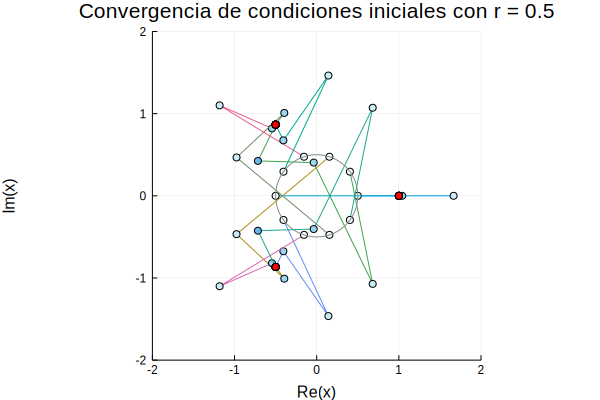

In [34]:
#Generando la visualización con r1 = 0.5 y 6 iteraciones:

r1 = 0.5
iteraciones = 6
condiciones_iniciales_1 = r1*unitarios
visualización_1 = comparación_valores_complejos(h, hprime, condiciones_iniciales_1, iteraciones)

#Para mejorar la legibilidad, se grafica un círculo con radio r1:

muestra_círculo = 0:0.01:2π
cosenos = cos.(muestra_círculo)
senos = sin.(muestra_círculo)

plot!(visualización_1, r1*cosenos, r1*senos, key = false, aspectratio = :equal, title = "Convergencia de condiciones iniciales con r = $r1", xlims = (-2, 2), ylims = (-2, 2))

#Y finalmente, se grafican las raíces de la función en rojo:

scatter!(visualización_1, [raíz_z0_analítica, raíz_z1_analítica, raíz_z2_analítica], color = :red)

Se observa que, contrario a lo que se esperaría, en este caso las trayectorias generadas por los puntos no convergen siempre a la raíz más cercana. Las raíces con argumento $\theta = \{ 0, \pi\}$ convergen a $z = 1$; aquellas con argumento $\theta = \{ \frac{2\pi}{10}, \frac{6\pi}{10}, \frac{8\pi}{10}, \frac{16\pi}{10} \}$ convergen a $ z = \exp(\frac{2\pi i}{3})$; y finalmente, aquellas con argumento $\theta = \{ \frac{4\pi}{10}, \frac{12\pi}{10}, \frac{14\pi}{10}, \frac{18\pi}{10}\}$ convergen a $ z = \exp(\frac{4\pi i}{3})$.

Para la segunda visualización:

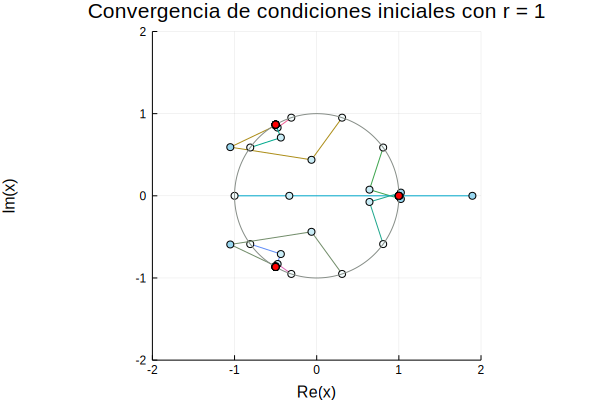

In [35]:
#Generando la visualización con r2 = 1 y 6 iteraciones:

r2 = 1
iteraciones = 6
condiciones_iniciales_2 = r2*unitarios
visualización_2 = comparación_valores_complejos(h, hprime, condiciones_iniciales_2, iteraciones)

#Para mejorar la legibilidad, se grafica un círculo con radio r2:

plot!(visualización_2, r2*cosenos, r2*senos, key = false, aspectratio = :equal, title = "Convergencia de condiciones iniciales con r = $r2", xlims = (-2, 2), ylims = (-2, 2))

#Y finalmente, se grafican las raíces de la función en rojo:

scatter!(visualización_2, [raíz_z0_analítica, raíz_z1_analítica, raíz_z2_analítica], color = :red)

Se observa que las trayectorias generadas por los puntos, salvo por $ z = \exp(i \pi)$, convergen siempre a la raíz más cercana. Las raíces con argumento $\theta = \{ 0, \frac{2\pi}{10}, \pi, \frac{18\pi}{10}\}$ convergen a $z = 1$; aquellas con argumento $\theta = \{ \frac{4\pi}{10}, \frac{6\pi}{10}, \frac{8\pi}{10}\}$ convergen a $ z = \exp(\frac{2\pi i}{3})$; y finalmente, aquellas con argumento $\theta = \{ \frac{12\pi}{10}, \frac{14\pi}{10}, \frac{16\pi}{10}\}$ convergen a $ z = \exp(\frac{4\pi i}{3})$.

Para la tercer visualización:

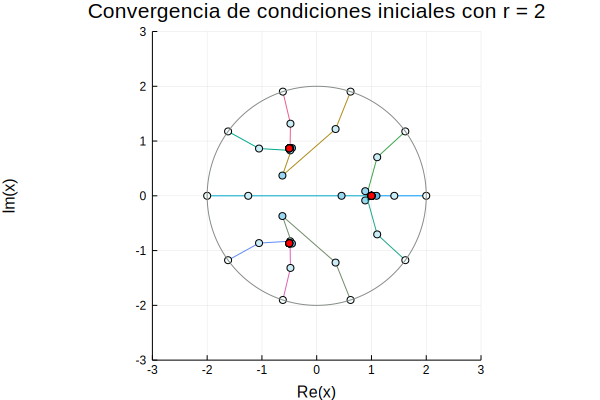

In [36]:
#Generando la visualización con r3 = 2 y 6 iteraciones:

r3 = 2
iteraciones = 6
condiciones_iniciales_3 = r3*unitarios
visualización_3 = comparación_valores_complejos(h, hprime, condiciones_iniciales_3, iteraciones)

#Para mejorar la legibilidad, se grafica un círculo con radio r3:

plot!(visualización_3, r3*cosenos, r3*senos, key = false, aspectratio = :equal, title = "Convergencia de condiciones iniciales con r = $r3", xlims = (-3, 3), ylims = (-3, 3))

#Y finalmente, se grafican las raíces de la función en rojo:

scatter!(visualización_3, [raíz_z0_analítica, raíz_z1_analítica, raíz_z2_analítica], color = :red)

Se observa que las trayectorias generadas por los puntos, salvo por $ z = \exp(i \pi)$, convergen siempre a la raíz más cercana. Las raíces con argumento $\theta = \{ 0, \frac{2\pi}{10}, \pi, \frac{18\pi}{10}\}$ convergen a $z = 1$; aquellas con argumento $\theta = \{ \frac{4\pi}{10}, \frac{6\pi}{10}, \frac{8\pi}{10}\}$ convergen a $ z = \exp(\frac{2\pi i}{3})$; y finalmente, aquellas con argumento $\theta = \{ \frac{12\pi}{10}, \frac{14\pi}{10}, \frac{16\pi}{10}\}$ convergen a $ z = \exp(\frac{4\pi i}{3})$.

Como se puede observar en todos los ejemplos usados, los valores suministrados siempre convergen a los valores analíticos de las raíces de la función $h(z) = z^3 - 1$; sin embargo, la convergencia a los valores no siempre es hacia la raíz más cercana al punto usado como condición inicial. Estos ejemplos no determinan la convergencia del método en todo el plano complejo.

## 4

- Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ de una variable (a priori arbitaria), en un punto $x_0$. Para esto, utilizaremos la aproximación de la derivada
que se basa en su definición:

$$ 
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} \equiv \frac{f(x_0+h)-f(x_0)}{h},
$$

lo que requiere de la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

- A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico respecto al valor *exacto*. Ilustren esto en una gráfica del error vs $h$, para $f(x) = 3x^3-2$, en $x_0=1$. 

**Definición de la derivada derecha**:

Se define la función que calcula la derivada numérica derecha:

In [37]:
"""
    derivada_derecha(f, x0, h)

`derivada_derecha` es una función que calcula la derivada numérica derecha de la función dada en el punto suministrado con el tamaño de paso definido.

# Definición

La derivada numérica derecha de `f` en el punto `x0` con tamaño de paso `h` está dada por: 

\$ f'_+ (x_0; h) = \frac{f(x_0 + h) - f(x_0)}{h}. \$

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función (compleja) de variable (compleja) de la que se quiere calcular la derivada,
* `x0`, el punto en el que se desea calcular la derivada, y,
* `h`, el tamaño de paso usado para aproximar la derivada exacta.

`derivada_derecha` requiere que `f` sea una función, y que `x0` y `h` sean números. En particular, para mejorar la estabilidad de tipo, `x0` y `h` son convertidos a números flotantes de 64 bits.

# Ejemplos:
```julia-repl
    julia> derivada_derecha(x -> x, 1, 0.01)
    1.0000000000000009

    julia> derivada_derecha(x -> x^2, 1, 0.01)
    2.0100000000000007

    julia> derivada_derecha(x -> sin(x), 0, 0.001)
    0.9999998333333416

    julia> derivada_derecha(x -> exp(x), 0, 0.001)
    1.0005001667083846
```
"""
function derivada_derecha(f::Function, x0::Number, h::Number)
    
    x0 = float(x0)
    h = float(h)
    
    derivada = (f(x0 + h) - f(x0))/h
    
    return(derivada)
end

derivada_derecha

**Definición de la función de error**:

Se define la función que calcula el valor absoluto de la diferencia entre la derivada numérica solicitada y la derivada analítica en el mismo punto:

In [38]:
"""
    error_derivada(f, fprime, x0, h, derivada)

`error_derivada` es una función que calcula, en un punto específico, el valor absoluto de la diferencia entre la derivada numérica obtenida con el método y tamaño de paso dados y la derivada analítica suministrada.

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función (compleja) de variable (compleja) de la que se quiere calcular la derivada,
* `fprime`, la función derivada de `f`,
* `x0`, el punto en el que se desea calcular el error,
* `h`, el tamaño de paso usado para aproximar la derivada exacta, y,
* `derivada`, la función usada para calcular la derivada numérica con la siguiente sintaxis: `derivada(f, x0, h)`.

`error_derivada` requiere que `f`, `fprime` y `derivada` sean funciones y que `x0` y `h` sean números. En particular, para mejorar la estabilidad de tipo, `x0` y `h` son convertidos a números flotantes de 64 bits.

# Ejemplos:
```julia-repl
    julia> error_derivada(x -> x, x -> 1, 1, 0.01, derivada_derecha)
    8.881784197001252e-16

    julia> error_derivada(x -> sin(x), x -> cos(x), 1, 0.01, derivada_derecha)
    0.00421632485627077

    julia> error_derivada(x -> sin(x), x -> cos(x), 1, 0.01, derivada_simétrica)
    9.004993406280803e-6

    julia> error_derivada(x -> sin(x), x -> cos(x), 1, 0.01, derivada_compleja)
    9.00508345647033e-6
```
"""
function error_derivada(f::Function, fprime::Function, x0::Number, h::Number, derivada::Function)
    
    x0 = float(x0)
    h = float(h)
    
    valor_analítico = fprime(x0)
    valor_numérico = derivada(f, x0, h)
    
    diferencia_absoluta = abs(valor_numérico - valor_analítico)
    
    return(diferencia_absoluta)
end    

error_derivada

**Estudio del error de la derivada numérica derecha de acuerdo al tamaño del paso**:

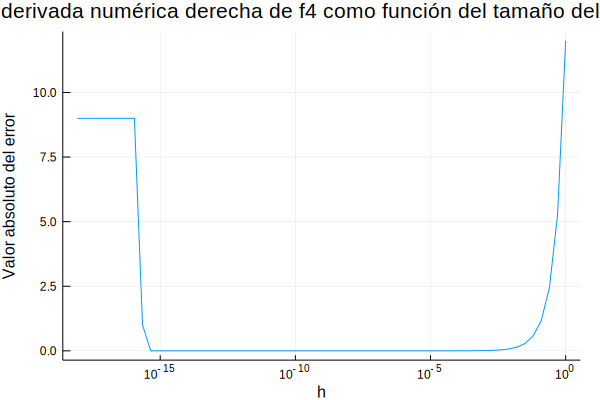

In [39]:
#Definiendo la función a usar de ejemplo:

f₄(x) = 3*x^3 - 2
f₄prime(x) = 9*x^2

#Definiendo el punto a estudiar:

x0 = 1

#Generando una gráfica del error como función del tamaño del paso:

log₂_recíproco_h_muestra = 0:60 #El arreglo de menos el logaritmo base 10 de los puntos muestra.
h_muestra = [1/(2^i) for i in log₂_recíproco_h_muestra] #El arreglo de los puntos muestra, potencias recíprocas de 2.

errores_f₄_derivada_derecha = []

for h_paso in h_muestra
    
    error = error_derivada(f₄, f₄prime, x0, h_paso, derivada_derecha)
    push!(errores_f₄_derivada_derecha, error)
end

gráfica_f₄_derivada_derecha = plot(h_muestra, errores_f₄_derivada_derecha, xscale = :log10, legend = false, xlabel = "h", ylabel = "Valor absoluto del error", title = "Error de la derivada numérica derecha de f4 como función del tamaño del paso en x0 = $x0" )

Se observa una mejora logarítmica, aunque "rápida" al inicio (cuando $h \approx 1$), del error. Este tiene un valor menor a $10^{-6}$ cuando $ h \lessapprox 10^{-8} $. Sin embargo, en torno a $h \approx 5 \times 10^{-16}$, el error aumenta de manera logarítmica para estabilizarse cerca de 10 cuando $h \lessapprox 10^{-16}$.

## 5

- Repitan el ejercicio anterior (escribe una función `derivada_simetrica`, usando ahora la aproximación *simétrica* (respecto a la ocurrencia de $h$) de la derivada, dada por

$$
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
$$

- ¿Por qué es correcto afirmar que la derivada simétrica resulta en una mejor aproximación que la derivada derecha? Argumenten y si es necesario usen argumentos analíticos.

**Definición de la derivada simétrica**:

Se define la función que calcula la derivada numérica simétrica:

In [40]:
"""
    derivada_simétrica(f, x0, h)

`derivada_simétrica` es una función que calcula la derivada numérica simétrica de la función dada en el punto suministrado con el tamaño de paso definido.

# Definición

La derivada numérica simétrica de `f` en el punto `x0` con tamaño de paso `h` está dada por: 

\$ f'_{sym} (x_0; h) = \frac{f(x_0 + h) - f(x_0 - h)}{2h}. \$

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función (compleja) de variable (compleja) de la que se quiere calcular la derivada,
* `x0`, el punto en el que se desea calcular la derivada, y,
* `h`, el tamaño de paso usado para aproximar la derivada exacta.

`derivada_simétrica` requiere que `f` sea una función, y que `x0` y `h` sean números. En particular, para mejorar la estabilidad de tipo, `x0` y `h` son convertidos a números flotantes de 64 bits.

# Ejemplos:
```julia-repl
    julia> derivada_simétrica(x -> x, 1, 0.01)
    1.0000000000000009

    julia> derivada_simétrica(x -> x^2, 1, 0.01)
    2.0000000000000018

    julia> derivada_simétrica(x -> sin(x), 0, 0.001)
    0.9999998333333416

    julia> derivada_simétrica(x -> exp(x), 0, 0.001)
    1.0000001666666813
```
"""
function derivada_simétrica(f::Function, x0::Number, h::Number)
    
    x0 = float(x0)
    h = float(h)
    
    derivada = (f(x0 + h) - f(x0 - h))/(2*h)
    
    return(derivada)
end

derivada_simétrica

**Estudio del error de la derivada numérica simétrica de acuerdo al tamaño del paso**:

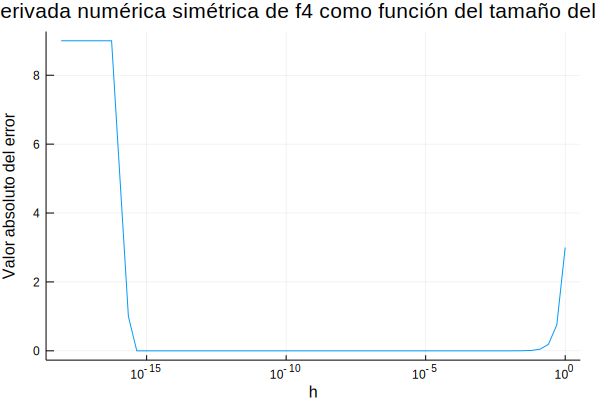

In [41]:
#Se usan los mismos puntos muestra que para el estudio del error de la derivada derecha:

errores_f₄_derivada_simétrica = []

for h_paso in h_muestra
    
    error = error_derivada(f₄, f₄prime, x0, h_paso, derivada_simétrica)
    push!(errores_f₄_derivada_simétrica, error)
end

gráfica_f₄_derivada_simétrica = plot(h_muestra, errores_f₄_derivada_simétrica, xscale = :log10, legend = false, xlabel = "h", ylabel = "Valor absoluto del error", title = "Error de la derivada numérica simétrica de f4 como función del tamaño del paso en x0 = $x0" )

Se observa una mejora logarítmica, aunque "rápida" al inicio (cuando $h \approx 1$), del error. Este tiene un valor menor a $10^{-6}$ cuando $ h \lessapprox 5 \times 10^{-4} $. Sin embargo, en torno a $h \approx 5 \times 10^{-16}$, el error aumenta de manera logarítmica para estabilizarse cerca de 10 cuando $h \lessapprox 10^{-16}$. Esto parece sugerir dos cosas:

1. La derivada numérica simétrica converge más rápido que la derivada numérica derecha en el ejemplo, y,
2. El error en el que se incurre para $h$ "muy bajo" no depende del método, sino de la función o de las limitaciones de la representación de números en la memoria.

**Argumentación sobre cuál método es mejor y por qué**:

Para tener una mejor idea sobre lo anterior, conviene realizar una gráfica comparativa:

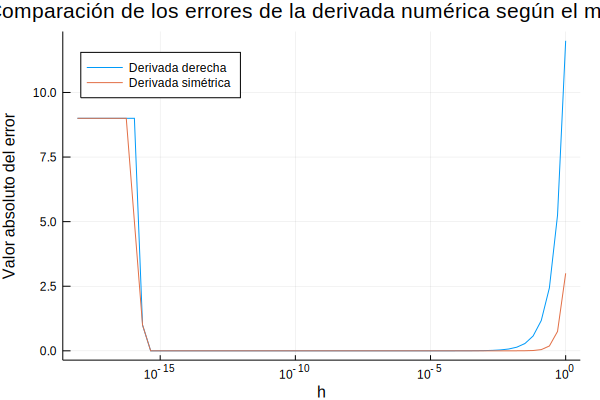

In [42]:
#Gráfica comparativa de los métodos.

gráfica_f₄_comparación = plot(h_muestra, errores_f₄_derivada_derecha, label = "Derivada derecha")
plot!(gráfica_f₄_comparación, h_muestra, errores_f₄_derivada_simétrica, label = "Derivada simétrica", xscale = :log10, legend = :topleft, xlabel = "h", ylabel = "Valor absoluto del error", title = "Comparación de los errores de la derivada numérica según el método")

Como se puede observar en el ejemplo, el método simétrico converge más rápido que el método derecho. Sin embargo, en torno a $ h = 10^{-8} $ ambos métodos tienen un error menor a $ 10 ^ 6 $. Obsérvese que ambos métodos se comportan de forma similar para $ h $ "muy bajos" ($ h \approx 10^{-16}$: el error aumenta rápidamente. Este orden de magnitud es el mismo que el del épsilon de la máquina, por lo que el aumento en el error podría deberse a las limitaciones de la representación de los flotantes en memoria. 

*Nota*: Investigando sobre el siguiente ejercicio, se encontró que en [este artículo](http://mdolab.engin.umich.edu/sites/default/files/Martins2003CSD.pdf) se menciona que el aumento en el error en el que se incurre para $h$ "pequeños" se debe a los errores incurridos por "cancelación vía sustracción". Al hacer esta afirmación, se cita un libro [Gill et al., 1981] en el que se describe que el "error de cancelación" consiste en que dos valores dados, al momento de ser representados como números de punto flotante y tomar su diferencia, si los valores son suficientemente cercanos y debido a la finitud de la precisión de las representaciones, la diferencia resultante (que aproxima la diferencia real) puede un error relativo mucho mayor a un múltiplo "pequeño" del épsilon de la máquina. Este error de cancelación ocurre precisamente al momento de tomar la diferencia para calcular el numerador con pasos pequeños, lo que explica tanto la anomalía de los datos en este régimen como el orden de magnitud en el que ocurre.

Una forma directa de entender por qué el método simétrico converge, en general, más rápido que el derecho consiste en observar lo siguiente:

Sea $f$ una función "decente" en el sentido de satisfacer en una vecindad de $x_0$, si $h$ es "suficientemente pequeño":

$$ f(x_0 \pm h) = f(x_0) \pm h f'(x_0) + \frac{h^2}{2!}f''(x_0) + \mathcal{O}(h^3), $$

dónde $ \mathcal{O}(h^n) $ es un término de error que tiende a cero conforme $ h \longrightarrow 0 $, con la rapidez de convergencia dada por el exponente $n$.

De esto, si $ f'_+(x_0; h) $ representa la derivada numérica derecha de $ f $ en $x_0$ con tamaño de paso $ h $, se tiene que:

$$ f'_+(x_0; h) := \frac{f(x_0 + h) - f(x_0)}{h} = f'(x_0) + \frac{h}{2}f''(x_0)+  \frac{1}{h} \mathcal{O}(h^3). $$

Y si $ f'_{sym}(x_0; h) $ representa la derivada numérica simétrica de $ f $ en $x_0$ con tamaño de paso $ h $:

$$ f'_{sym}(x_0; h) := \frac{f(x_0 + h) - f(x_0 - h)}{2h} = f'(x_0) + \frac{1}{2h} \mathcal{O}(h^3). $$

Si $ f $ es "decente" y $ h < 1 $, entonces, en general:

$$ f'_+(x_0; h) = f'(x_0) + \frac{h}{2}f''(x_0)+  \frac{1}{h} \mathcal{O}(h^3) = f'(x_0) + \mathcal{O}(h), $$

y,

$$ f'_{sym}(x_0; h) = f'(x_0) + \mathcal{O}(h^2). $$


Por lo que el término del error en el método derecho es en general lineal (salvo en el caso en el que $ f''(x_0) = 0 $, en cuyo caso será cuadrático), mientras que el término del error en el método simétrico es cuadrático en general. Esto quiere decir que el método simétrico converge como el cuadrado del tamaño del paso dado, a diferencia de la convergencia lineal (en general) del método derecho, lo que explica que el método simétrico sea más rápido en converger. La razón por la cual no se aprecia el tipo de convergencia calculado en los ejemplos es por el tipo de puntos muestra usados para las gráficas: no son suficientes para refinar el detalle de la forma de convergencia.

## 6

- Definan la función `derivada_compleja` considerando la definición de la derivada dada por:
$$
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big),
$$
donde $\Im$ indica la parte imaginaria del argumento ($i=\sqrt{-1}$). 

- Argumenta (analíticamente) por qué esta definición da tan buen resultado. ¿Hay algún caso en que esta definición puede dar resultados inesperados?

In [43]:
"""
    derivada_compleja(f, x0, h)

`derivada_compleja` es una función que calcula la derivada numérica compleja de la función dada en el punto suministrado con el tamaño de paso definido.

# Definición

La derivada numérica compleja de `f` en el punto `x0` con tamaño de paso `h` está dada por: 

\$ f'_{cmplx} (x_0; h) = \Im \left( \frac{f(x_0 + ih)}{h} \right). \$

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función (real) de variable (real) de la que se quiere calcular la derivada,
* `x0`, el punto en el que se desea calcular la derivada, y,
* `h`, el tamaño de paso usado para aproximar la derivada exacta.

`derivada_compleja` requiere que `f` sea una función, y que `x0` y `h` sean números. En particular, para mejorar la estabilidad de tipo, `x0` y `h` son convertidos a números flotantes de 64 bits.

# Ejemplos:
```julia-repl
    julia> derivada_compleja(x -> x, 1, 0.01)
    1.0

    julia> derivada_compleja(x -> x^2, 1, 0.01)
    2.0

    julia> derivada_compleja(x -> sin(x), 0, 0.001)
    1.0000001666666751

    julia> derivada_compleja(x -> exp(x), 0, 0.001)
    0.9999998333333416
```

# Notas:

*Nota*: Por la definición de la derivada numérica compleja, esta sólo funciona para funciones reales que puedan ser extendidas al plano complejo con una función analítica en una vecindad del punto de interés. Esta función no aproxima adecuadamente la derivada de una función compleja.
"""
function derivada_compleja(f::Function, x0::Number, h::Number)

    x0 = float(x0)
    h = float(h)
    
    derivada = f(x0 + h*im)/ h
    
    return(derivada.im)
end

derivada_compleja

**Estudio del error de la derivada numérica compleja de acuerdo al tamaño del paso**:

Para completar esto, conviene realizar un estudio de la dependencia del error respecto al tamaño del paso similar a los realizados anteriormente:

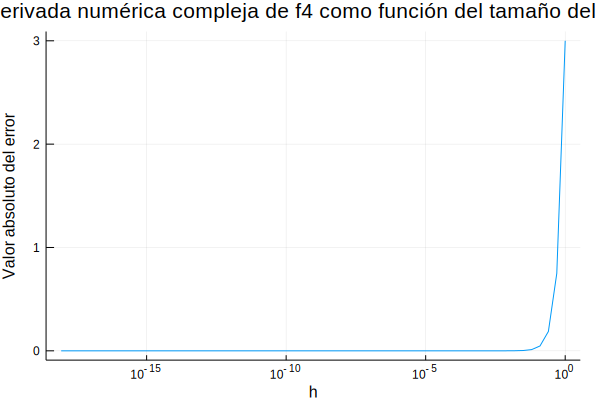

In [44]:
#Se usan los mismos puntos muestra que para el estudio del error de la derivada derecha:

errores_f₄_derivada_compleja = []

for h_paso in h_muestra
    
    error = error_derivada(f₄, f₄prime, x0, h_paso, derivada_compleja)
    push!(errores_f₄_derivada_compleja, error)
end

gráfica_f₄_derivada_compleja = plot(h_muestra, errores_f₄_derivada_compleja, xscale = :log10, legend = false, xlabel = "h", ylabel = "Valor absoluto del error", title = "Error de la derivada numérica compleja de f4 como función del tamaño del paso en x0 = $x0")

Se observa una mejora logarítmica, aunque "rápida" al inicio (cuando $h \approx 1$), del error. Este tiene un valor menor a $10^{-6}$ cuando $ h \lessapprox 5 \times 10^{-4} $. No existe el comportamiento anómalo observado en los ejemplos anteriores para $h$ pequeña. Esto, según lo comentado por el artículo mencionado en el ejercicio 5 ([Este](http://mdolab.engin.umich.edu/sites/default/files/Martins2003CSD.pdf)), se debe a que no se incurre en error de cancelación al no tomarse diferencia alguna.

Para ver esto de forma más explícita se pueden graficar los resultados de lar tres definiciones de la derivada numérica:

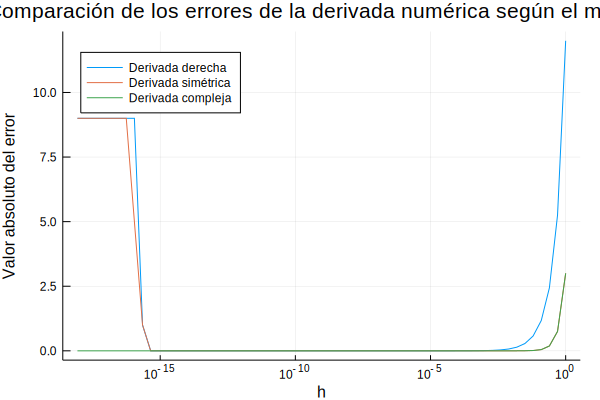

In [45]:
#Gráfica comparativa de los métodos.

#Agregando los últimos datos a la comparación anterior:
plot!(gráfica_f₄_comparación, h_muestra, errores_f₄_derivada_compleja, label = "Derivada compleja")

Como se observa, para el ejemplo, la derivada compleja converge aparentemente tan rápido como la derivada simétrica, aunque no presenta el error para $h \approx 10^{-16}$, lo que parece confirmar lo mencionado en la referencia.

**Comentario sobre el por qué el método funciona**:

Para entender por qué el método funciona tan bien, considérese el siguiente planteamiento, derivado de [este artículo](http://mdolab.engin.umich.edu/sites/default/files/Martins2003CSD.pdf) y [este post](https://timvieira.github.io/blog/post/2014/08/07/complex-step-derivative/):

Sea $ f: \mathbb{R} \rightarrow \mathbb{R} $ una función diferenciable en una vecindad $V$ de $ x_0 \in \mathbb{R}$. Sea $F: A \subseteq \mathbb{C}$ la "complejificación" de $ f $ en el sentido de que $F|_U(X) = f(x)$ con $U = V \times \{0\} \subset \mathbb{C}$ y $X = (x,0) \in \mathbb{C} $; entonces, si $F$ es analítica en el sentido complejo en $ A $ y $u: \mathbb{C} \rightarrow \mathbb{R} $ y $v: \mathbb{C} \rightarrow \mathbb{R} $ con $F(x + iy) = u(x + iy) + i v(x + iy)$, se tiene que para todo punto $z \in U$ deben de satisfacerse las ecuaciones de Riemann-Cauchy:

$$ \frac{\partial u}{\partial x}(z) = \frac{\partial v}{\partial y}(z), $$

y, 

$$ \frac{\partial v}{\partial x}(z) = -\frac{\partial u}{\partial y}(z). $$

(Es decir, $F$ es una función compleja y analítica en su dominio tal que su restricción a un intervalo de la recta real que contiene a $x_0$ es igual a $f$. Por ser $F$ analítica, todo punto en su dominio satisface las ecuaciones de Riemann-Cauchy.)

De esto, como $f$ es una función real de variable real, si $ z = x + 0i \in U$: $f(x) = F(z) = u(x) + v(x) = u(x)$, es decir: $v(x) = 0$. 


En particular, si $ x_0 \in V$ y  $ z = x_0 + 0i \in U$:

$$ f'(x_0) = \frac{\partial u}{\partial x} (x_0) = \frac{\partial v}{\partial y}(x_0) = \lim_{h \rightarrow 0} \frac{v(x_0 + ih) - v(x_0) }{\partial h} = \lim_{h \rightarrow 0} \frac{v(x_0 + ih) }{h} = \lim_{h \rightarrow 0} \Im \left( \frac{F(x_0 + ih) }{h} \right).$$

Obsérvese que $h \in \mathbb{R}.$

Esto permite entender por qué la derivada numérica compleja es definida de la siguiente forma:

$$ f'_{cmplx} (x_0; h) = \Im \left( \frac{f(x_0 + ih)}{h} \right). $$

Y en específico, por qué esta no presenta los problemas que las otras derivadas: porque no involucra sustracciones que lleven a errores de cancelación.

Una forma sencilla de dar cotas de convergencia para el método, es analizar la complejificación de la función dada. Dado que $F$ es analítica en un dominio $A$ que contiene al punto real de interés, denotando la derivada compleja de $F$ mediante $\frac{\text{d} F}{\text{d}z} $:

$$ F(x_0 + i h) = F(x_0) + i h \frac{\text{d} F}{\text{d}z}(x_0) + \mathcal{O}(h^2),$$

de dónde, al ser $v(x) = 0$ y $f(x) = u(x)$ en la recta real, para $h$ "pequeño":

$$ F(x_0 + i h) = f(x_0) + i h f'(x_0) + \frac{(ih)^2}{2!} f''(x_0) + \frac{(ih)^3}{3!} f'''(x_0) + \mathcal{O}(h^4)\\
    = f(x_0) + i h f'(x_0) - \frac{h^2}{2!} f''(x_0) - \frac{ih^3}{3!} f'''(x_0) + \mathcal{O}(h^4).
$$

Reordenando:

$$
   F(x_0 + i h) = f(x_0) - \frac{h^2}{2!} f''(x_0) + i \big[ h f'(x_0) - \frac{h^3}{3!} f'''(x_0) \big] + \mathcal{O}(h^4),
$$

por lo que:

$$ \Im \left( \frac{F(x_0 + i h)}{h} \right) = f'(x_0) - \frac{h^2}{3!} f'''(x_0) + \mathcal{O}(h^3).  $$

De esta última expresión, se tiene:

$$ f'(x_0) = \Im \left( \frac{F(x_0 + i h)}{h} \right) + \frac{h^2}{3!} f'''(x_0) + \mathcal{O}(h^3) = \Im \left( \frac{F(x_0 + i h)}{h} \right) + \mathcal{O}(h^2) = f'_{cmplx} (x_0; h) + \mathcal{O}(h^2),  $$

por lo que la expresión de la derivada numérica compleja tiene un error que va como el cuadrado del tamaño del paso respecto del valor analítico. Esto explica el por qué el error de este método es similar al error del método simétrico para $h \approx 1$. La razón por la cual no se aprecia directamente esto en la gráfica es la misma que en los casos anteriores: no hay suficientes puntos para observar esto con detalle.

**Sobre las limitaciones de la derivada numérica compleja**:

En el artículo se menciona que funciones que no tienen una complejificación analítica pueden dar resultados anómalos. Un ejemplo de esto (al menos con la extensión estándar) es la función valor absoluto. 

Sea $ z = x + iy$. La extensión de la función valor absoluto dada por $|z|_1 = \sqrt{ x^2 + y^2}$ es una función real de variable compleja, por lo que la parte imaginaria de esta extensión es idénticamente cero. Esta extensión no es analítica debido a que no satisface las ecuaciones de Riemann-Cauchy. (La parcial de la función respecto de x no es idénticamente cero.)

Observemos lo que sucede al usar esta definición de la función:

In [46]:
#Es necesario (re)definir la función valor absoluto para poder obtener un número complejo (aunque con parte compleja cero) como resultado:

absoluto_1(z) = Complex(abs(z))

#Calculando la derivada numérica compleja de la función en x0 = 1:

derivada_compleja(absoluto_1, 1, 0.01)

0.0

Como se puede observar, la derivada numérica compleja arroja un resultado equivocado en este ejemplo.

Una forma de poder usar este método para esta función, es definir la siguiente complejificación de la función valor absoluto (dada en el artículo), que satisface ser analítica (por partes) en el sentido complejo:

In [47]:
#Definiendo la complejificación analítica:

function absoluto_2(z)
    
    z = Complex{Float64}(z)
    
    x = z.re
    y = z.im
    
    if x < 0
        return(-z)
        
    else x > 0
        return(z)
    end
end

#Calculando la derivada numérica compleja de la función en x0 = 1:

derivada_compleja(absoluto_2, 1, 0.01)

1.0

En este caso se obtiene el resultado correcto.

Otras funciones en las que la derivada numérica compleja no dará resultados adecuados son funciones que arrojen resultados complejos en el punto en el que se quiere calcular la derivada, esto debido a que en la deducción se requirió que el valor resultante de la función sea real. Un ejemplo de esto es tratar de calcular la derivada de la función identidad en el punto $ z = i $:

In [48]:
derivada_compleja(z -> z, im, 0.01)

101.0

Como se puede apreciar, el resultado es incorrecto.